<a href="https://colab.research.google.com/github/kushpal/Machine-Learning/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**Implement KNN classification and regression using Numpy and Pandas. Keep the distance metric as a func-
tion argument which can take: ’Euclidean’, ’Manhattan’ or ’Cosine’**

---

In [0]:
import numpy as np
import pandas as pd
import operator 

In [0]:
def KNN_predict(train_X, train_Y, test_X, K,Type='classification',  distance_metric='Euclidean'):
    train_X=np.array(train_X)
    train_Y=np.array(train_Y)
    train_Y=np.reshape(train_Y,(-1,1))
    train_X=np.append(train_X,train_Y,axis=1)
    y_pred=[]
    for i in range(len(test_X)):
        neighbors=getKNeighbors(train_X,test_X[i], K,distance_metric)
        y_pred.append(get_class(neighbors,Type))
    return np.array(y_pred)

In [0]:
def getKNeighbors(train_X, test_X, k,distance_metric):
    distances = []
    length = len(test_X)-1
    for i in range(len(train_X)):
        if distance_metric=='Euclidean':
            dist = Euclidean(test_X, train_X[i], length)
            distances.append((train_X[i], dist))
        if distance_metric=='Manhattan':
            dist = Manhattan(test_X, train_X[i], length)
            distances.append((train_X[i], dist))
        if distance_metric=='Cosine':
            dist = Cosine(test_X, train_X[i], length)
            distances.append((train_X[i], dist))    
           
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

In [0]:
def get_class(neighbors,Type):
    classes = {}
    if Type=='classification':
        for i in range(len(neighbors)):
            pred = neighbors[i][-1]
            if pred in classes:
                classes[pred] += 1
            else:
                classes[pred] = 1
        y_pred = sorted(classes.items(), key=operator.itemgetter(1), reverse=True)
        return y_pred[0][0]
    if Type=='regression':
        nsum=0
        for i in range(len(neighbors)):
            nsum+=neighbors[i][-1]
        return nsum/len(neighbors)

In [0]:
def Euclidean(p1, p2, length):
    distance = 0
    for i in range(length):
        distance += pow((p1[i] - p2[i]), 2)
    return np.sqrt(distance)

In [0]:
def Manhattan(p1, p2, length):
    dis=0
    for i in range(length):
        dis+=np.absolute(p1[i]-p2[i])
    return dis

In [0]:
def Cosine(p1,p2,length):
    mult=0
    sum_p1=0
    sum_p2=0
    for i in range(length):
        mult+=p1[i]*p2[i]
        sum_p1+=np.power(p1[i],2)
        sum_p2+=np.power(p2[i],2)
    res=mult/(np.sqrt(sum_p1)*np.sqrt(sum_p2))
    return res

In [0]:
train_X = [[2, 2, 2], [4, 4, 4],[1,2,3],[2,2,1]]
test_X = [[1, 0, 4]]
K = 3
train_Y=[[1.0212],[1.212],[4.021],[4.214]]

y_pred=KNN_predict(train_X, train_Y, test_X, K,Type='regression',  distance_metric='Euclidean')
print(y_pred)

[ 3.0854]


---

**Vary the dimension (number of features of X) and the number of train instances and empirically show the
runtime of your algorithm as function of dimension and number of train instances. Feel free to use randomly
generated data. How does this compare with the theoretical time complexity of KNN?**

---

In [0]:
import time
K=7
time_f =[]
for i in range(8,101):
    train_X=np.random.rand(i,100)
    test_X=np.random.rand(i,100)
    train_Y=np.random.rand(i)
    t1 = time.time()
    KNN_predict(train_X, train_Y, test_X, K,Type='regression',  distance_metric='Euclidean')
    np.set_printoptions(precision=4)
    t2 = time.time()
    time_f.append(t2-t1)
time_d=[]    
for i in range(8,101):
    train_X=np.random.rand(100,i)
    test_X=np.random.rand(100,i)
    train_Y=np.random.rand(100)
    t1 = time.time()
    KNN_predict(train_X, train_Y, test_X, K,Type='regression',  distance_metric='Euclidean')
    np.set_printoptions(precision=4)
    t2 = time.time()
    time_d.append(t2-t1)
    

Text(0,0.5,'time')

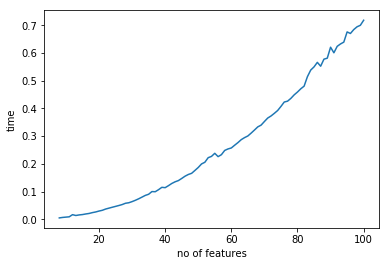

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline
x=np.arange(8,101)
plt.plot(x,time_f)
plt.xlabel('no of features')
plt.ylabel('time')

Text(0,0.5,'time')

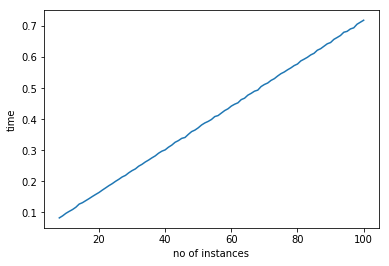

In [0]:
plt.plot(x, time_d)
plt.xlabel('no of instances')
plt.ylabel('time')

---

**Show the usage of scikit learn’s KNN module for the real estate price prediction regression problem.**

---

<br>

---

>**(a)** Using 5-fold cross-validation report the optimal K value for each fold, alongside, Train, Validation and Test
RMSE error. How does the test error compare with the test errors for the different folds you obtained in eariler
assignments.

---

<br>

In [0]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [0]:
def training_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
def validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
def testing_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def complete_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = training_error(X_train[:20], y_train[:20], model)
    test_error = testing_error(X_train[80:], y_train[80:], model)
    val_error = validation_error(X_test, y_test, model)
    return train_error,val_error,test_error

In [0]:
mini=10000
K =5 
k_range = range(1, 20)

data=pd.read_csv("Real_estate_valuation_data_set.csv")
target=data['Y house price of unit area']
kf = KFold(n_splits=K, shuffle=True, random_state=15)
for k in k_range:
    train_errors = []
    test_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data,target):
        X_train1, X_val = data.iloc[train_index], data.iloc[val_index]
        y_train1, y_val = target.iloc[train_index], target.iloc[val_index]
        knn = KNN(n_neighbors=k)
        train_error,val_error,test_error = complete_metrics(X_train1, y_train1, X_val, y_val, knn)
        train_errors.append(train_error)
        validation_errors.append(val_error)
        test_errors.append(test_error)
    print('K: {:6} | mean(train_error): {:7} |mean(test_error): {:7} | mean(val_error): {:7}'.format(k,round(np.mean(train_errors),4),round(np.mean(test_errors),4),round(np.mean(validation_errors),4)))
    if np.mean(validation_errors)<mini:
        mini=np.mean(validation_errors)
        optimal_k=k
print('Optimal value of k:',optimal_k)
            

K:      1 | mean(train_error):     0.0 |mean(test_error):     0.0 | mean(val_error): 79.2481
K:      2 | mean(train_error): 26.2468 |mean(test_error): 23.4899 | mean(val_error): 75.6316
K:      3 | mean(train_error): 35.0742 |mean(test_error): 36.2493 | mean(val_error): 75.3495
K:      4 | mean(train_error): 39.5728 |mean(test_error): 44.2758 | mean(val_error): 72.0821
K:      5 | mean(train_error): 42.3695 |mean(test_error):  50.837 | mean(val_error): 72.9873
K:      6 | mean(train_error): 48.2627 |mean(test_error): 55.5382 | mean(val_error): 71.8902
K:      7 | mean(train_error): 48.9447 |mean(test_error):  58.637 | mean(val_error): 71.5657
K:      8 | mean(train_error):  49.691 |mean(test_error): 60.2988 | mean(val_error): 70.4289
K:      9 | mean(train_error): 50.5586 |mean(test_error): 61.0476 | mean(val_error): 70.0447
K:     10 | mean(train_error): 51.6439 |mean(test_error): 63.5974 | mean(val_error): 71.7149
K:     11 | mean(train_error): 51.5888 |mean(test_error): 65.4944 | me

<br>

---

>**(b)** Are all the features on the same scale in the above solution? Does that impact KNN? Now, scale the
features between 0 and 1. You may also want to ensure that when you’re predicting, you scale the input features of the test set using the same function used to transform the train input features. Using 5-fold cross-
validation report the optimal K value for each fold, alongside, Train, Validation and Test RMSE error.

---

<br>

In [0]:
from sklearn import preprocessing
mini=10000
K =5 
k_range = range(1, 20)

data=pd.read_csv("Real_estate_valuation_data_set.csv")
data=data.drop(columns=['No'])
names = data.columns
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=names)

data=scaled_data
target=data['Y house price of unit area']

kf = KFold(n_splits=K, shuffle=True, random_state=15)
for k in k_range:
    train_errors = []
    test_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data,target):
        X_train1, X_val = data.iloc[train_index], data.iloc[val_index]
        y_train1, y_val = target.iloc[train_index], target.iloc[val_index]
        knn = KNN(n_neighbors=k)
        train_error,val_error,test_error = complete_metrics(X_train1, y_train1, X_val, y_val, knn)
        train_errors.append(train_error)
        validation_errors.append(val_error)
        test_errors.append(test_error)
    print('K: {:6} | mean(train_error): {:7} |mean(test_error): {:7} | mean(val_error): {:7}'.format(k,round(np.mean(train_errors),4),round(np.mean(test_errors),4),round(np.mean(validation_errors),4)))
    if np.mean(validation_errors)<mini:
        mini=np.mean(validation_errors)
        optimal_k=k
print('Optimal value of k:',optimal_k)
            

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


K:      1 | mean(train_error):     0.0 |mean(test_error):     0.0 | mean(val_error):   0.004
K:      2 | mean(train_error):  0.0005 |mean(test_error):  0.0011 | mean(val_error):  0.0035
K:      3 | mean(train_error):  0.0007 |mean(test_error):  0.0018 | mean(val_error):  0.0035
K:      4 | mean(train_error):  0.0008 |mean(test_error):  0.0022 | mean(val_error):  0.0034
K:      5 | mean(train_error):   0.001 |mean(test_error):  0.0026 | mean(val_error):  0.0035
K:      6 | mean(train_error):  0.0012 |mean(test_error):   0.003 | mean(val_error):  0.0038
K:      7 | mean(train_error):  0.0013 |mean(test_error):  0.0031 | mean(val_error):  0.0039
K:      8 | mean(train_error):  0.0015 |mean(test_error):  0.0033 | mean(val_error):   0.004
K:      9 | mean(train_error):  0.0016 |mean(test_error):  0.0036 | mean(val_error):   0.004
K:     10 | mean(train_error):  0.0016 |mean(test_error):  0.0038 | mean(val_error):  0.0041
K:     11 | mean(train_error):  0.0017 |mean(test_error):   0.004 | me

<br>

---

>**(c)** Let us pick up a single fold (train on first 80% data and last 20% as test data) and plot train, test error as a function of K. Comment on the shape of the train error curve.

---

<br>

In [0]:
data=pd.read_csv("Real_estate_valuation_data_set.csv")


In [0]:
x_train=data.drop(columns=['Y house price of unit area'])

y_train=data['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [0]:
k_range = range(1, 50)

error_test=[]
error_train=[]
max_err=-1

for k in k_range:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    y_pred_t=knn.predict(X_train)
    err=mean_squared_error(y_test, y_pred)
    if err>max_err:
        max_err=err
        k_v=k
    error_test.append(err)
    error_train.append(mean_squared_error(y_train, y_pred_t))
    

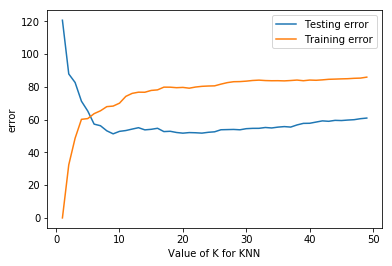

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, error_test)
plt.xlabel('Value of K for KNN')
plt.ylabel('error')
plt.plot(k_range, error_train)
plt.legend(['Testing error','Training error'])


For training error if the value of k increases then training error also increases

<br>

---

>> i. On this test set, find the home which gives the maximum RMSE error. What can you say about KNN performance on this home. Why is it poor? Is there something you could do to improve the prediction
for this home?

---


In [0]:
print("Max test rmse is ",max_err," when k value is ",k_v)

Max test rmse is  120.597951807  when k value is  1


<br>

---

**Draw a Voronoi diagram for the IRIS dataset for 1-NN, where we are only using ‘sepal-length‘ and ‘sepal-width‘
as the two fearures. You could use 3 different colours for the 3 different classes. What can you infer from this
diagram?**

---

<br>

In [0]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.neighbors import KNeighborsRegressor as KNN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')

d={'sepal-length':data.SepalLengthCm,'sepal-width':data.SepalWidthCm}
newdata=pd.DataFrame(d)
x_train=data.drop(['Species'],axis=1)
y_train=data['Species']

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
#y_train=le.inverse_transform(y_train)

In [0]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
knn = KNN(n_neighbors=1)
knn.fit(x_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [0]:
A = knn.predict(x_train)

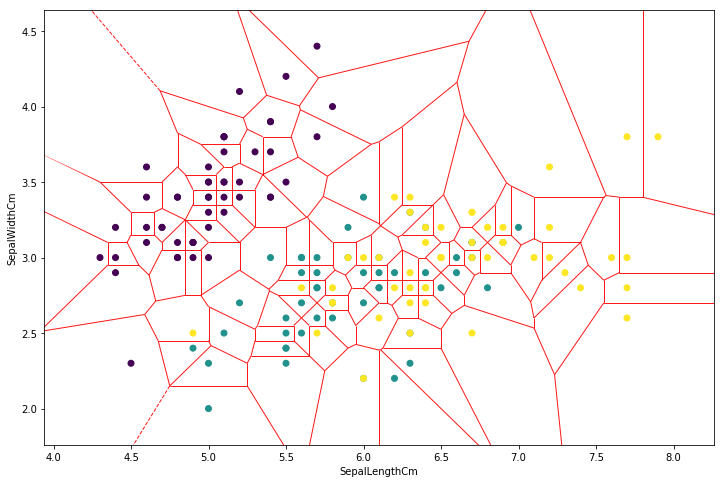

In [0]:
points=[]
for i in range(len(data.SepalLengthCm)):
    points.append([data.SepalLengthCm[i],data.SepalWidthCm[i]])
plt.rcParams["figure.figsize"] = [12,8]
vor=Voronoi(points)
voronoi_plot_2d(vor,show_vertices=False,c=A ,line_alpha=0.9, line_colors='red',show_points=False)
plt.scatter(data.SepalLengthCm,data.SepalWidthCm,c=A, marker='o', cmap='viridis')
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()

**References:**

[1]. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html

[2]. https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning